In [3]:
!pip install malaya

     |████████████████████████████████| 1.9MB 2.7MB/s 
     |████████████████████████████████| 51kB 19.0MB/s 
     |████████████████████████████████| 15.8MB 762kB/s 
     |████████████████████████████████| 51kB 18.6MB/s 
     |████████████████████████████████| 215kB 40.1MB/s 
     |████████████████████████████████| 245kB 42.7MB/s 
     |████████████████████████████████| 757kB 39.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [0]:
import malaya

#Sentiment Analysis

In [0]:
positive_text = 'ini film yang bagus. semua karakter baik dan cerita itu berkembang dengan baik'
negative_text = 'saya tidak suka film sama sekali. itu sangat menghina bagi wanita'

In [5]:
model = malaya.sentiment.multinomial()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.0027189865541020803, 'positive': 0.7281013445897866, 'neutral': 0.26917966885611133}
{'negative': 0.4578141996912817, 'positive': 0.005421858003087175, 'neutral': 0.5367639423056312}


[{'negative': 0.4578141996912817,
  'neutral': 0.5367639423056312,
  'positive': 0.005421858003087175},
 {'negative': 0.4578141996912817,
  'neutral': 0.5367639423056312,
  'positive': 0.005421858003087175}]

In [7]:
model = malaya.sentiment.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'negative': 0.0007522807, 'positive': 0.9247718, 'neutral': 0.074475944}
{'negative': 0.67031276, 'positive': 0.003296872, 'neutral': 0.3263904}


[{'negative': 0.67031276, 'neutral': 0.3263904, 'positive': 0.003296872},
 {'negative': 0.67031276, 'neutral': 0.3263904, 'positive': 0.003296872}]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
model = malaya.sentiment.deep_model('bahdanau')

W0731 10:48:25.961196 140049293916032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/malaya/_utils/_utils.py:42: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0731 10:48:25.962979 140049293916032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/malaya/_utils/_utils.py:43: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W0731 10:48:31.888449 140049293916032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/malaya/_utils/_utils.py:38: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



In [10]:
model.predict(positive_text)

'positive'

In [11]:
result = model.predict(positive_text,get_proba=True,add_neutral=False)
result

{'attention': {'.': 0.0,
  'bagus': 0.9860342,
  'baik': 0.0012354748,
  'berkembang': 0.0013881467,
  'cerita': 0.0011790991,
  'dan': 0.0,
  'dengan': 0.0010477707,
  'film': 0.0015923409,
  'ini': 0.00080676284,
  'itu': 0.0012903572,
  'karakter': 0.0019806782,
  'semua': 0.001203103,
  'yang': 0.00087157777},
 'negative': 0.04020967,
 'positive': 0.95979035}

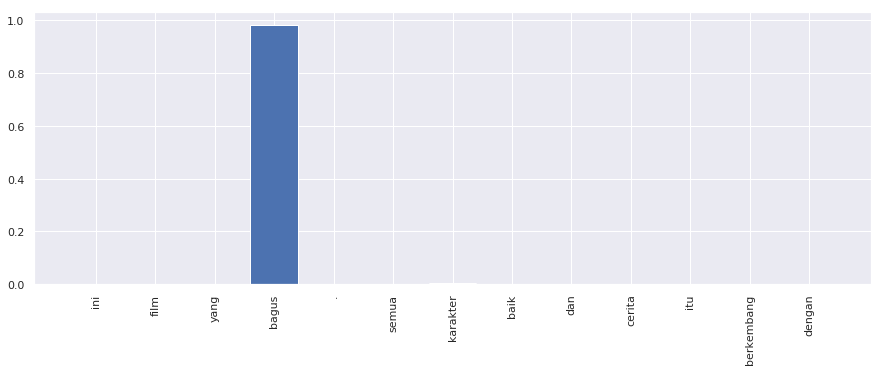

In [11]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

In [12]:
model.predict_words(positive_text)

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]

stopping Server...


In [12]:
model.predict_batch([negative_text, positive_text],get_proba=True)

[{'negative': 0.82160866, 'neutral': 0.17660743, 'positive': 0.0017839129},
 {'negative': 0.0010771597, 'neutral': 0.10663867, 'positive': 0.89228415}]

In [5]:
!pip3 install bert-tensorflow

In [13]:
model = malaya.sentiment.bert()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [14]:
model.predict_batch([negative_text, positive_text],get_proba=False)

['negative', 'positive']

In [15]:
multinomial = malaya.sentiment.multinomial()
xgb = malaya.sentiment.xgb()
bahdanau = malaya.sentiment.deep_model('bahdanau')
bert = malaya.sentiment.bert()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.clos

In [16]:
malaya.stack.predict_stack([multinomial, xgb, bahdanau,bert], negative_text)

{'negative': 0.652310286095372,
 'neutral': 0.2719686025123549,
 'positive': 0.0027471570741089365}

In [0]:
results = malaya.stack.predict_stack([multinomial, xgb, bahdanau,bert], negative_text)

In [19]:
results

{'negative': 0.7114417085881863,
 'neutral': 0.16884499048160984,
 'positive': 0.0017055045042853262}

In [21]:
max(results, key=results.get)

'negative'

In [0]:
import pandas as pd
df = pd.read_csv("FinalSentimentData.csv")

In [13]:
bert.predict(negative_text)

'negative'

In [0]:
def getSentiment(eachValue):
  return model.predict(eachValue, get_proba=False)

%timeit
import malaya
bert = malaya.sentiment.bert()
model = malaya.sentiment.xgb()
df_s = df[:100]
df['newClass'] = df['class'].apply(getSentiment)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
df.to_csv("FinalSentimentNewOutput.csv")

In [0]:
import seaborn as sns
sns.countplot(x="class", data=df)

In [0]:
import seaborn as sns
sns.countplot(x="newClass", data=df)

In [10]:
df_s.iloc[95]['doc_text']

'Kebijaksanaan teks itu lembut, namun mendesak, itu membuat Anda memahami hal-hal yang selalu Anda ketahui'

In [9]:
df_s.iloc[95]

Unnamed: 0                                                     95
Unnamed: 0.1                                                   95
Unnamed: 2                                                    NaN
Unnamed: 3                                                    NaN
class                                                    positive
doc_text        Kebijaksanaan teks itu lembut, namun mendesak,...
newClass                                                  neutral
Name: 95, dtype: object